# Tools provided to post processing routing product 
    
## Content

- Install processing tools with anaconda
- Overview of routing product
- Tool 1 select region of interest from routing product 
- Tool 2 Simplify the routing product by inccrease minimum catchment drainage area
- Tool 3 Simplify the routing product by remove lakes with lake area
- Tool 5 Define HRUs
- Tool 6 Generate Raven Inputs


## Install processing tools with anaconda
------

### Step 1 Install anaconda 

The installer of anaconda can be installed from [here](https://www.anaconda.com/). Tools can be used without anaconda. If no anaconda is installed user has to manually setup QGIS python enviroment. 

### Step 2 Create a empty python enviroment  

If you already have installed anaconda and a python envriroment for qgis has been installed. Go to step 4. 

```
conda create --name <any_name_for_env>

```
Then 
Arctive your pyenv, by 
```
conda activate <any_name_for_env>

```

### Step 3 Install qgsi to this enviroment  

```
conda install -c conda-forge qgis

```

### Step 4 add downloaded toolbox to this enviroment  

```
conda develop /path_to_QGIS_Routing_Toolbox
conda develop /path_to_QGIS_Routing_Toolbox/Common_functions

```



## Over view of the routing product
------
The routing product includes three parts:
- The first part is subbasin polygons that are ready to be used for hydrological modeling.The name is 'finalcat_info.shp' for polgyon and 'finalcat_info_riv.shp' for river network. 
- The second part is the subbasin polygons that need further processed. These product can be used when anyone want to simplify the current routing sturcture. The file names are 'finalriv_info_ply.shp' for polygon and 'finalriv_info.shp' for river network. 
- The third part includes both connected lake polygons and non-connected lake polygons. Both connected lake and non-connected will drain water to the watershed outlet. The difference is connected lake are connected by river network defined by 'finalcat_info_riv.shp', while non-connected lake polygon are not connected by 'finalcat_info_riv.shp'

<AxesSubplot:>

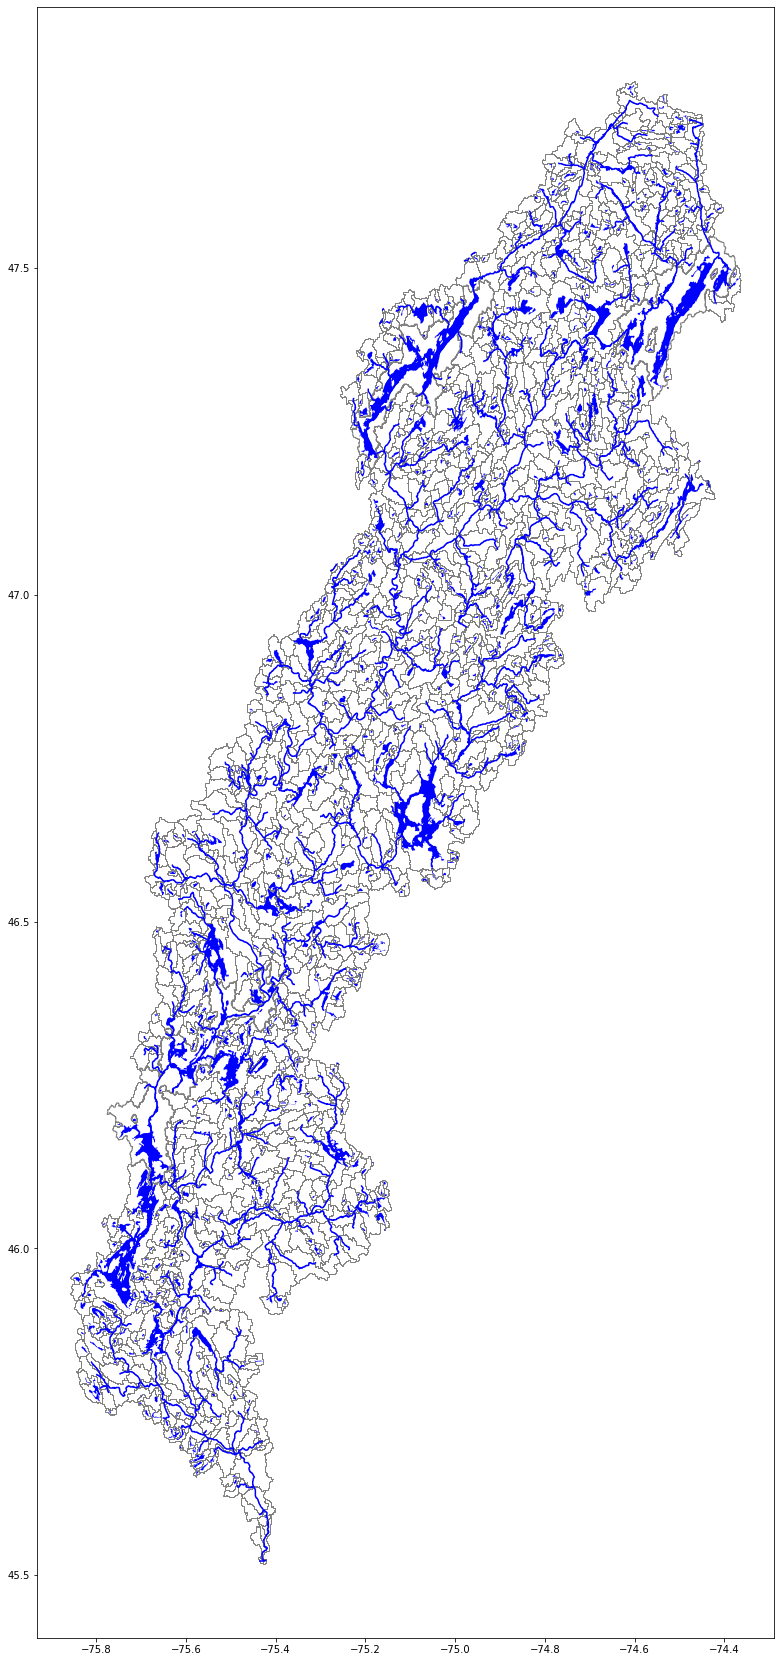

In [1]:

import os
import geopandas as gdb
import matplotlib.pyplot as plt

### This is folder contains the developed lake river routing product
GitHub_Folder = "C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/"
Routing_Product_Folder = os.path.join(GitHub_Folder,'RoutingTool','Toolbox_QGIS','tests','testdata','Routing_product_V2')

### The routing product inlucding three part
# first part
Path_final_info      =os.path.join(Routing_Product_Folder,'finalcat_info.shp')
Path_final_info_riv  =os.path.join(Routing_Product_Folder,'finalcat_info_riv.shp')
#second part
Path_final_riv_ply   = os.path.join(Routing_Product_Folder,'finalriv_info_ply.shp') ### River polyline 
Path_final_riv       = os.path.join(Routing_Product_Folder,'finalriv_info.shp')     ### Catchment polygons 
# third part
Path_Con_Lake_ply    = os.path.join(Routing_Product_Folder,'Con_Lake_Ply.shp')      ### Connected lake polygons
Path_NonCon_Lake_ply = os.path.join(Routing_Product_Folder,'Non_Con_Lake_Ply.shp')  ### None connected lake polygons



### plot ready to be used routing product 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_fisrtpart = gdb.read_file(Path_final_info_riv)
riv_fisrtpart.plot(color="blue",ax=ax)

subbasin_fisrtpart = gdb.read_file(Path_final_info)
subbasin_fisrtpart.plot(color="None", edgecolor='grey',ax=ax)

<AxesSubplot:>

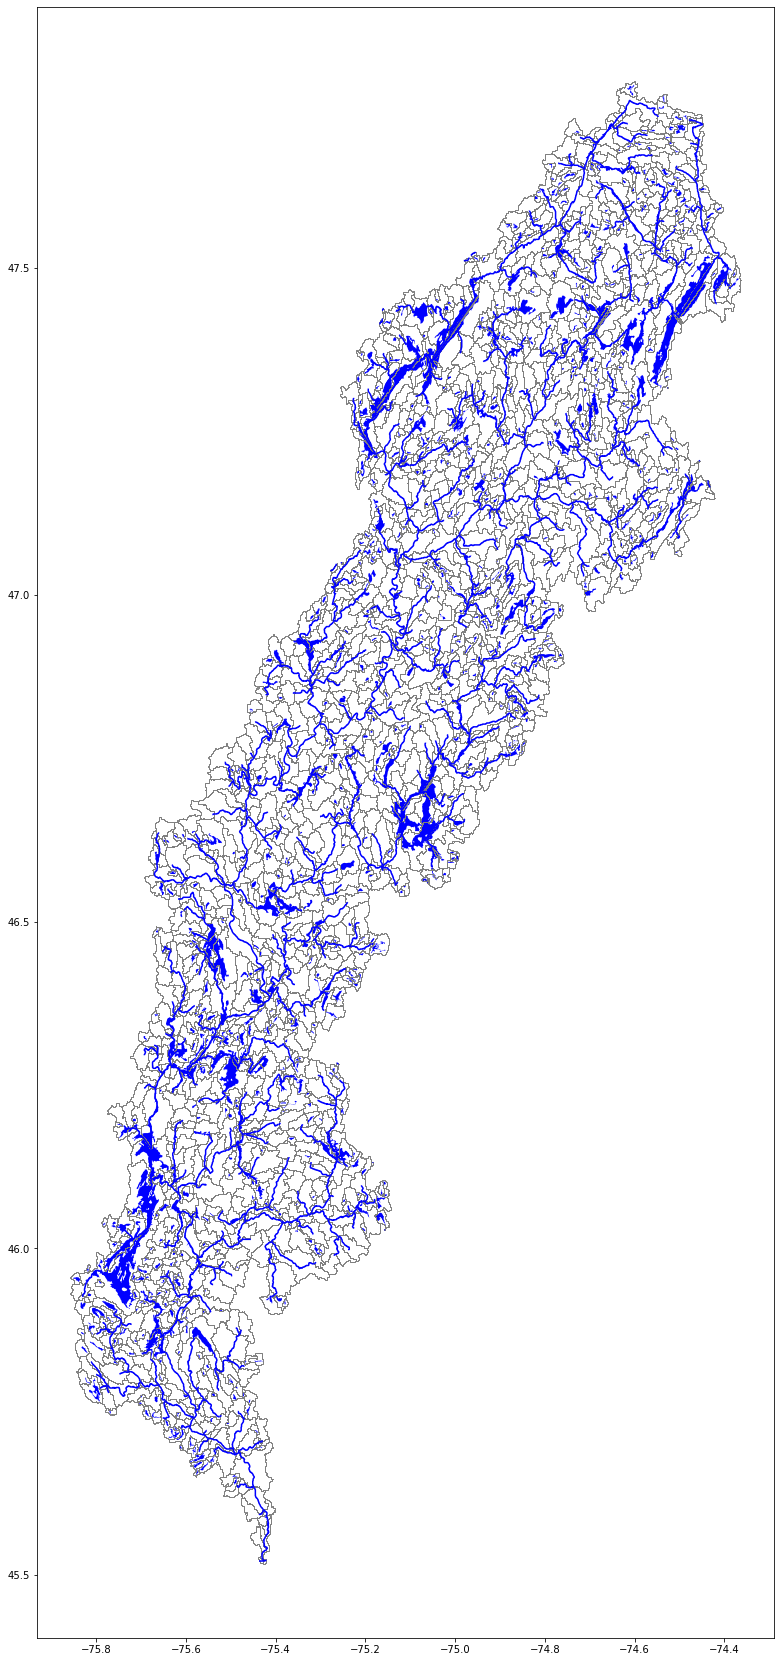

In [2]:
### plot routing product can be used to simplify above routing structure 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_secondpart = gdb.read_file(Path_final_riv)
riv_secondpart.plot(color="blue",ax=ax)

Subbasin_ply_secondpart = gdb.read_file(Path_final_riv_ply)
Subbasin_ply_secondpart.plot(color="None", edgecolor='grey',ax=ax)

## Tool 1 select region of interest from routing product 
------

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


<ipython-input-3-8b98705802c0>:9: ResourceWarning: unclosed file <_io.BufferedReader name='C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/RoutingTool\\Toolbox_QGIS\\tests\\testdata\\Routing_product_V2\\finalriv_info_ply.dbf'>
  subid = RTtool.Locate_subid_needsbyuser(Gauge_NMS = Gauge_NM,Path_products=Path_final_riv_ply)
C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:3916: ResourceWarning: unclosed file <_io.BufferedReader name='C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/WoodLake_Project\\Models\\02LE024\\finalriv_info_ply.dbf'>
  finalcat_info    = finalcat_info.to_dataframe().drop_duplicates('SubId', keep='first')
<ipython-input-3-8b98705802c0>:10: ResourceWarning: unclosed file <_io.BufferedReader name='C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/RoutingTool\\Toolbox_QGIS\\t

<AxesSubplot:>

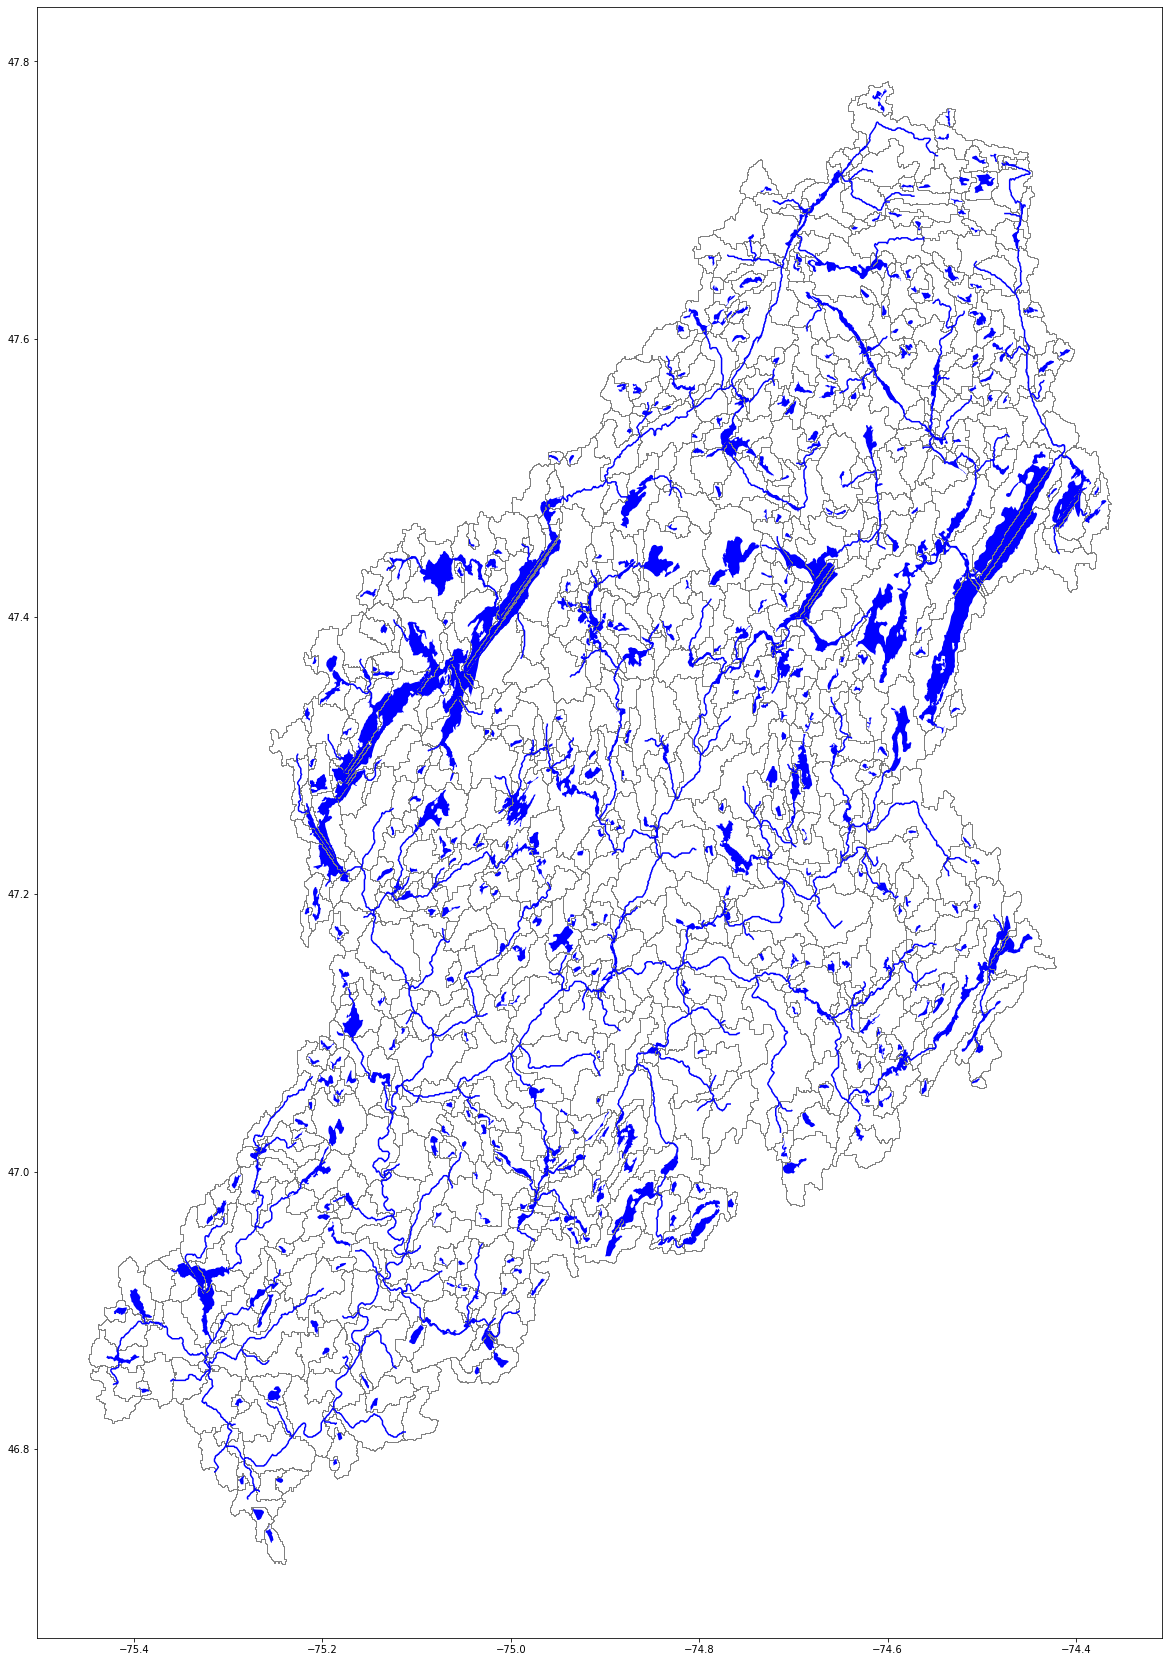

In [3]:
os.environ["QGISPrefixPath"] = 'C:/Users/dustm/anaconda3/envs/geo_py3/Library/python/qgis/'
os.environ["RoutingToolFolder"] = os.path.join(GitHub_Folder,'RoutingTool','Toolbox_QGIS')
from ToolboxClass import LRRT

Gauge_NM = ['02LE024'] ## the interest gauge name 
OutputFolder = os.path.join(GitHub_Folder,'WoodLake_Project','Models',Gauge_NM[0]) ## output folder 

RTtool=LRRT()
subid = RTtool.Locate_subid_needsbyuser(Gauge_NMS = Gauge_NM,Path_products=Path_final_riv_ply)
RTtool.Select_Routing_product_based_SubId(OutputFolder = OutputFolder,Path_Con_Lake_ply = Path_Con_Lake_ply,Path_NonCon_Lake_ply= Path_NonCon_Lake_ply,Path_Catchment_Polygon = Path_final_riv_ply, Path_River_Polyline = Path_final_riv, mostdownid = subid)

### four files will be generated in the output folder 

#second part
Path_final_riv_ply   = os.path.join(OutputFolder,'finalriv_info_ply.shp') ### River polyline 
Path_final_riv       = os.path.join(OutputFolder,'finalriv_info.shp')     ### Catchment polygons 
# third part
Path_Con_Lake_ply    = os.path.join(OutputFolder,'Con_Lake_Ply.shp')      ### Connected lake polygons
Path_NonCon_Lake_ply = os.path.join(OutputFolder,'Non_Con_Lake_Ply.shp')  ### None connected lake polygons

### plot routing product can be used to simplify above routing structure 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_secondpart = gdb.read_file(Path_final_riv)
riv_secondpart.plot(color="blue",ax=ax)

Subbasin_ply_secondpart = gdb.read_file(Path_final_riv_ply)
Subbasin_ply_secondpart.plot(color="None", edgecolor='grey',ax=ax)


## Tool 2 simplify routing structure by increase catchment minimum drainage area 
------

C:\Users\dustm\anaconda3\envs\geo_py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:4023: ResourceWarning: unclosed file <_io.BufferedReader name='C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/WoodLake_Project\\Models\\02LE024\\finalriv_info_ply.dbf'>
  finalriv_info    = finalriv_info.to_dataframe().drop_duplicates(sub_colnm, keep='first')
C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:4047: ResourceWarning: unclosed file <_io.BufferedReader name='C:/User

<AxesSubplot:>

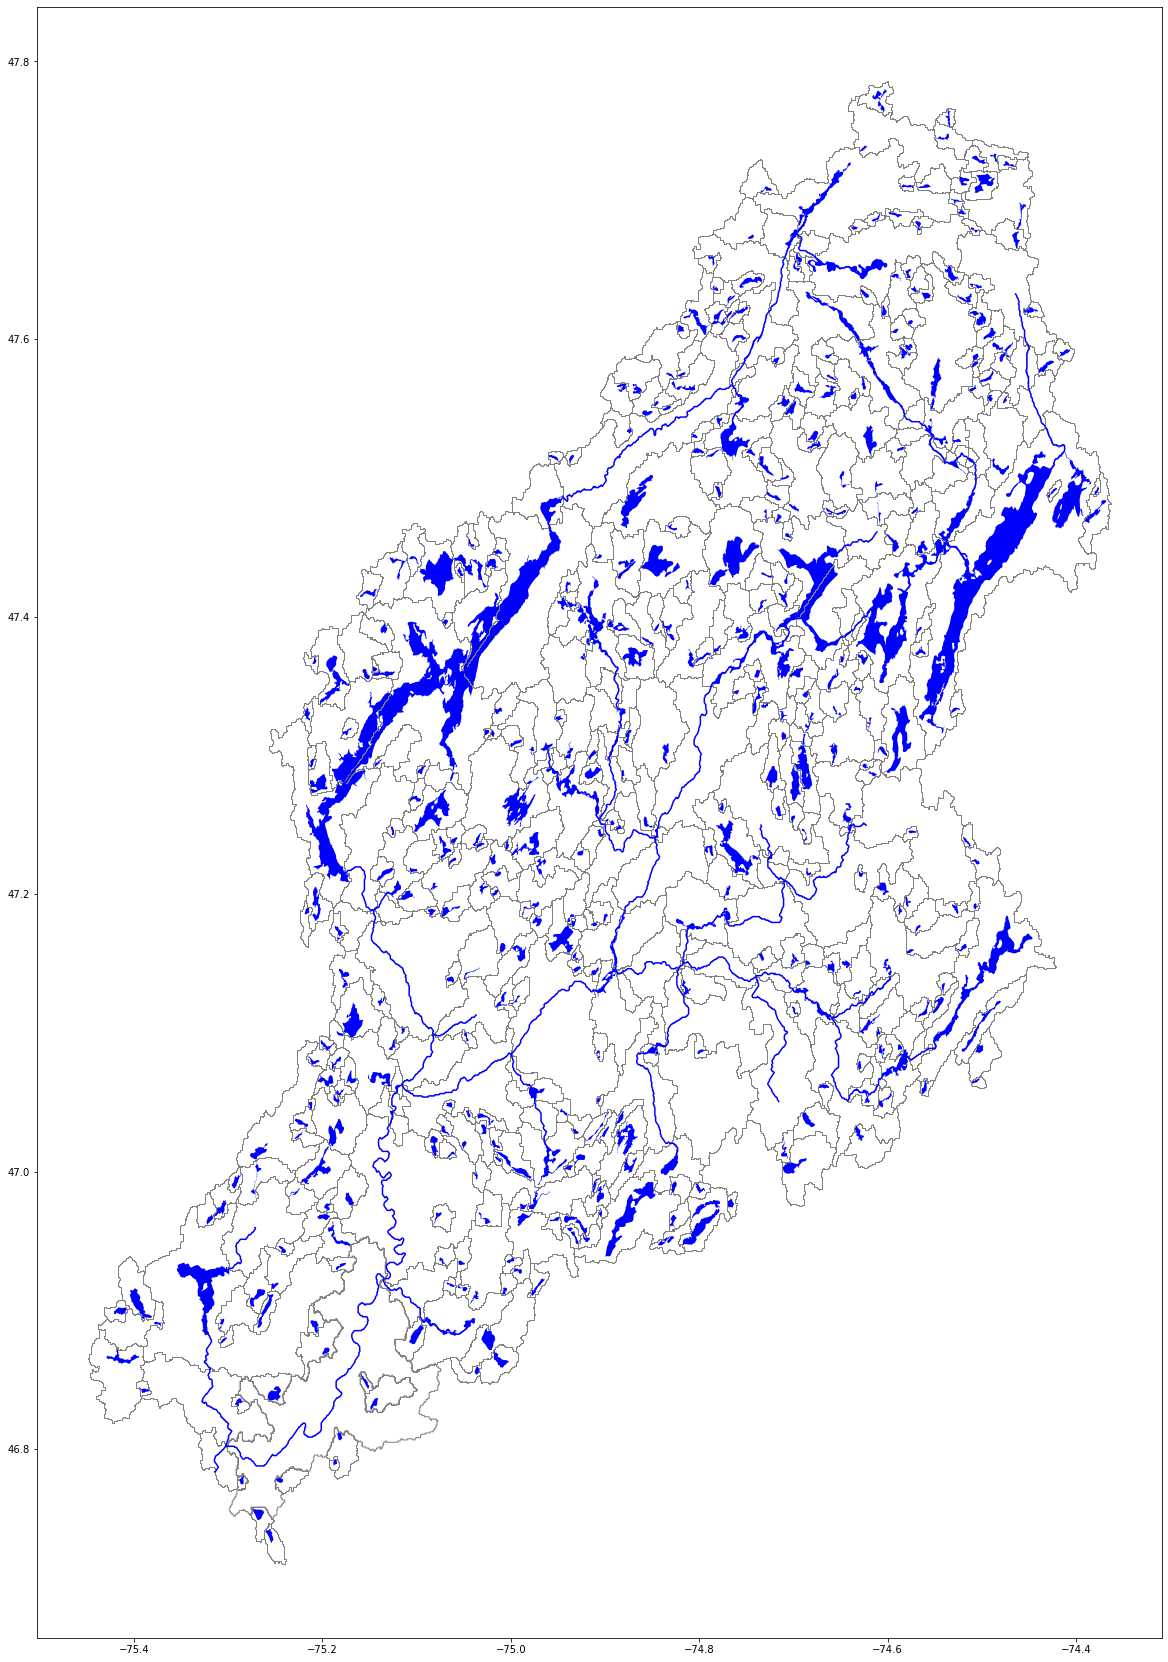

In [4]:
Output_Folder_simplify_by_DA = os.path.join(GitHub_Folder,'WoodLake_Project','Models','Simple_DA')
Area_Min = 60 #km2
RTtool.Customize_Routing_Topology(Path_final_riv_ply =Path_final_riv_ply,
                                  Path_final_riv = Path_final_riv,
                                  Path_Con_Lake_ply = Path_Con_Lake_ply,
                                  Path_NonCon_Lake_ply = Path_NonCon_Lake_ply,
                                  Area_Min = Area_Min,OutputFolder = Output_Folder_simplify_by_DA)
### four files will be generated in the output folder 

#second part
Path_final_riv_ply   = os.path.join(Output_Folder_simplify_by_DA,'finalriv_info_ply.shp') ### River polyline 
Path_final_riv       = os.path.join(Output_Folder_simplify_by_DA,'finalriv_info.shp')     ### Catchment polygons 
# third part
Path_Con_Lake_ply    = os.path.join(Output_Folder_simplify_by_DA,'Con_Lake_Ply.shp')      ### Connected lake polygons
Path_NonCon_Lake_ply = os.path.join(Output_Folder_simplify_by_DA,'Non_Con_Lake_Ply.shp')  ### None connected lake polygons

### plot routing product can be used to simplify above routing structure 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_secondpart = gdb.read_file(Path_final_riv)
riv_secondpart.plot(color="blue",ax=ax)

Subbasin_ply_secondpart = gdb.read_file(Path_final_riv_ply)
Subbasin_ply_secondpart.plot(color="None", edgecolor='grey',ax=ax)


## Tool 3 simplify routing structure by remove small lakes 
------

C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:4323: ResourceWarning: unclosed file <_io.BufferedReader name='C:/Users/dustm/Documents/ubuntu/share/OneDrive/OneDrive - University of Waterloo/GitHub/WoodLake_Project\\Models\\Simple_DA\\finalriv_info_ply.dbf'>
  finalcat_info    = finalcat_info.to_dataframe()


####################################### Obtain selected Lake IDs done


C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:4391: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\dustm\\AppData\\Local\\Temp\\grassdata_toolbox_temp\\9470\\temp_finalriv_ply_selectlake.dbf'>
  finalcat_info_temp    = finalcat_info_temp.to_dataframe()


####################################### Processing connected lake ids done


<AxesSubplot:>

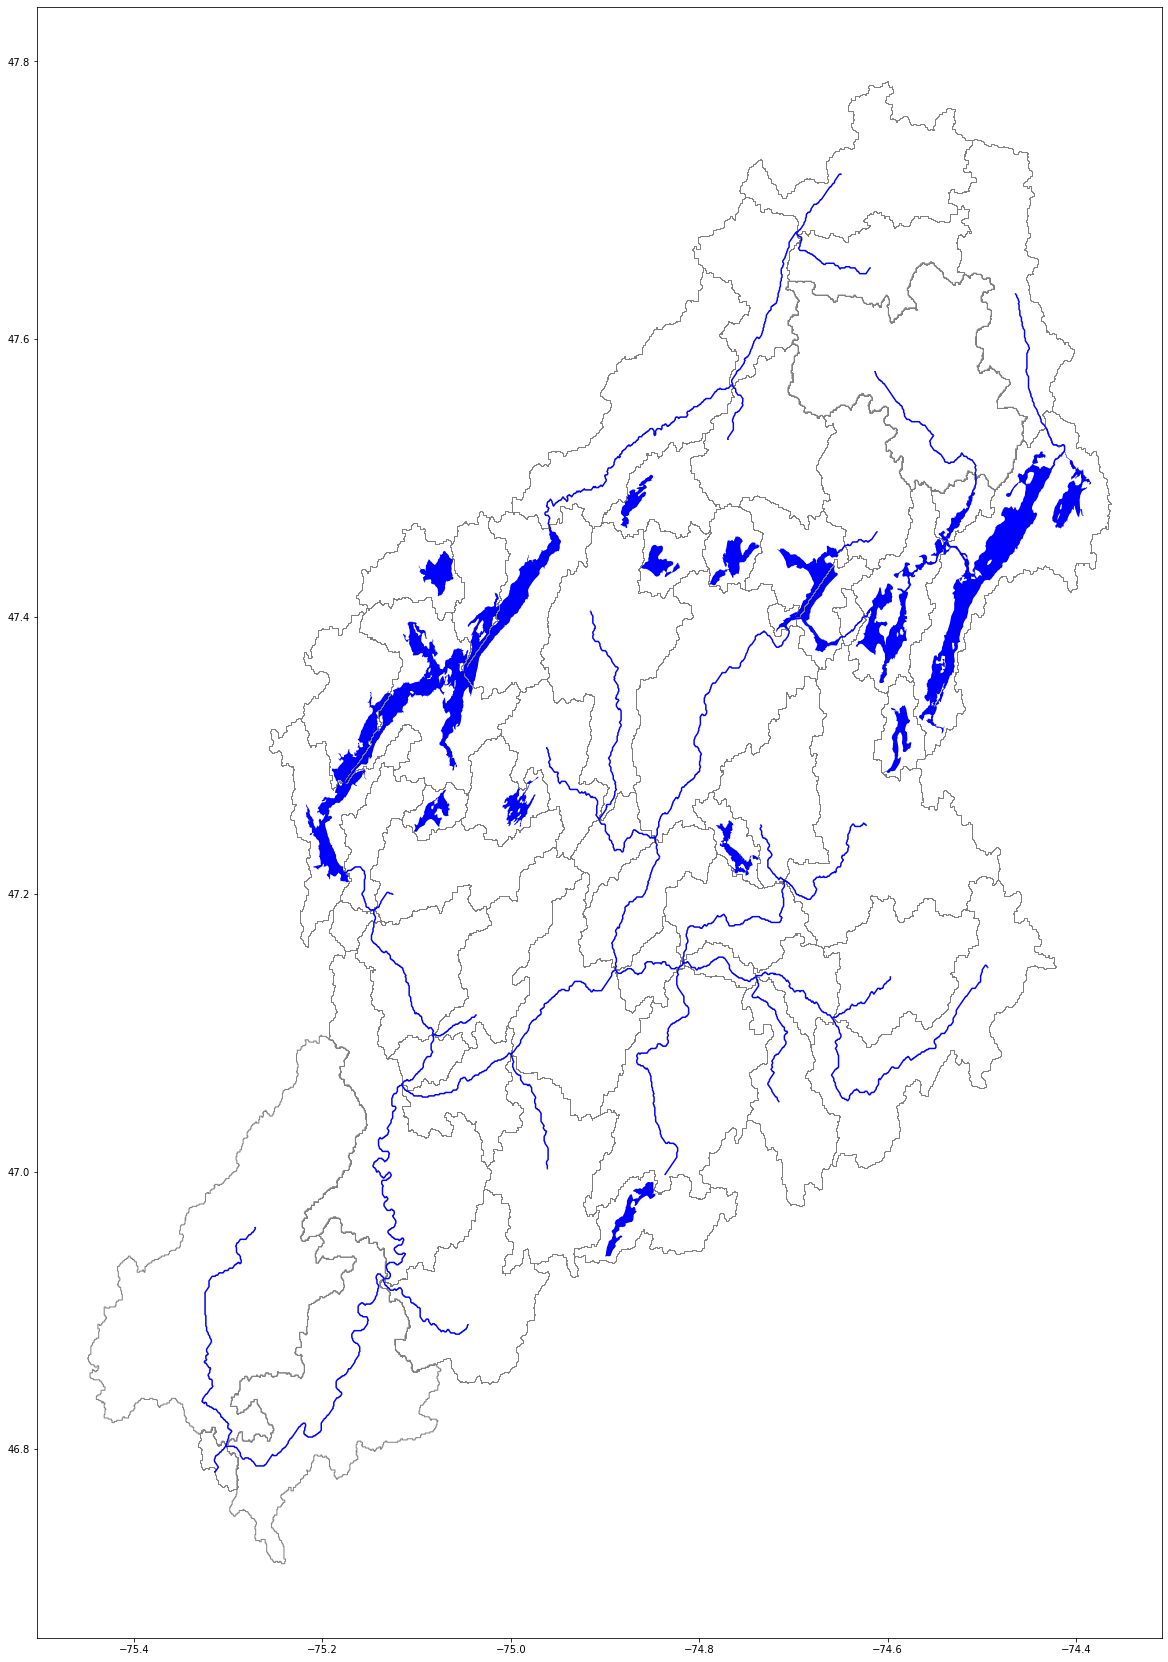

In [6]:
Output_Folder_simplify_by_Lake = os.path.join(GitHub_Folder,'WoodLake_Project','Models','Simple_lake')
Lake_Area_thresthold_Connected_Lake    = 10 #km2
Lake_Area_thresthold_NonConnected_Lake = 3 #km2


RTtool.SelectLakes(Path_final_riv_ply = Path_final_riv_ply,
                                Path_final_riv = Path_final_riv, 
                                Path_Con_Lake_ply=Path_Con_Lake_ply,
                                Path_NonCon_Lake_ply=Path_NonCon_Lake_ply,
                                Thres_Area_Conn_Lakes = Lake_Area_thresthold_Connected_Lake,
                                Thres_Area_Non_Conn_Lakes = Lake_Area_thresthold_NonConnected_Lake,
                                Selection_Method = 'ByArea',
                                OutputFolder = Output_Folder_simplify_by_Lake)
### four files will be generated in the output folder 

#second part
Path_final_riv_ply   = os.path.join(Output_Folder_simplify_by_Lake,'finalriv_info_ply.shp') ### River polyline 
Path_final_riv       = os.path.join(Output_Folder_simplify_by_Lake,'finalriv_info.shp')     ### Catchment polygons 
# third part
Path_Con_Lake_ply    = os.path.join(Output_Folder_simplify_by_Lake,'Con_Lake_Ply.shp')      ### Connected lake polygons
Path_NonCon_Lake_ply = os.path.join(Output_Folder_simplify_by_Lake,'Non_Con_Lake_Ply.shp')  ### None connected lake polygons

### plot routing product can be used to simplify above routing structure 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_secondpart = gdb.read_file(Path_final_riv)
riv_secondpart.plot(color="blue",ax=ax)

Subbasin_ply_secondpart = gdb.read_file(Path_final_riv_ply)
Subbasin_ply_secondpart.plot(color="None", edgecolor='grey',ax=ax)

## Tool 4 Generate final routing product  
------

C:\Users\dustm\anaconda3\envs\geo_py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\dustm\Documents\ubuntu\share\OneDrive\OneDrive - University of Waterloo\GitHub\RoutingTool\Toolbox_QGIS\ToolboxClass.py:4598: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\dustm\\AppData\\Local\\Temp\\grassdata_toolbox_temp\\9470\\temp_finalriv_ply7172.dbf'>
  finalrivply_info    = finalrivply_info.to_dataframe().drop_duplicates('SubId', keep='first')


<AxesSubplot:>

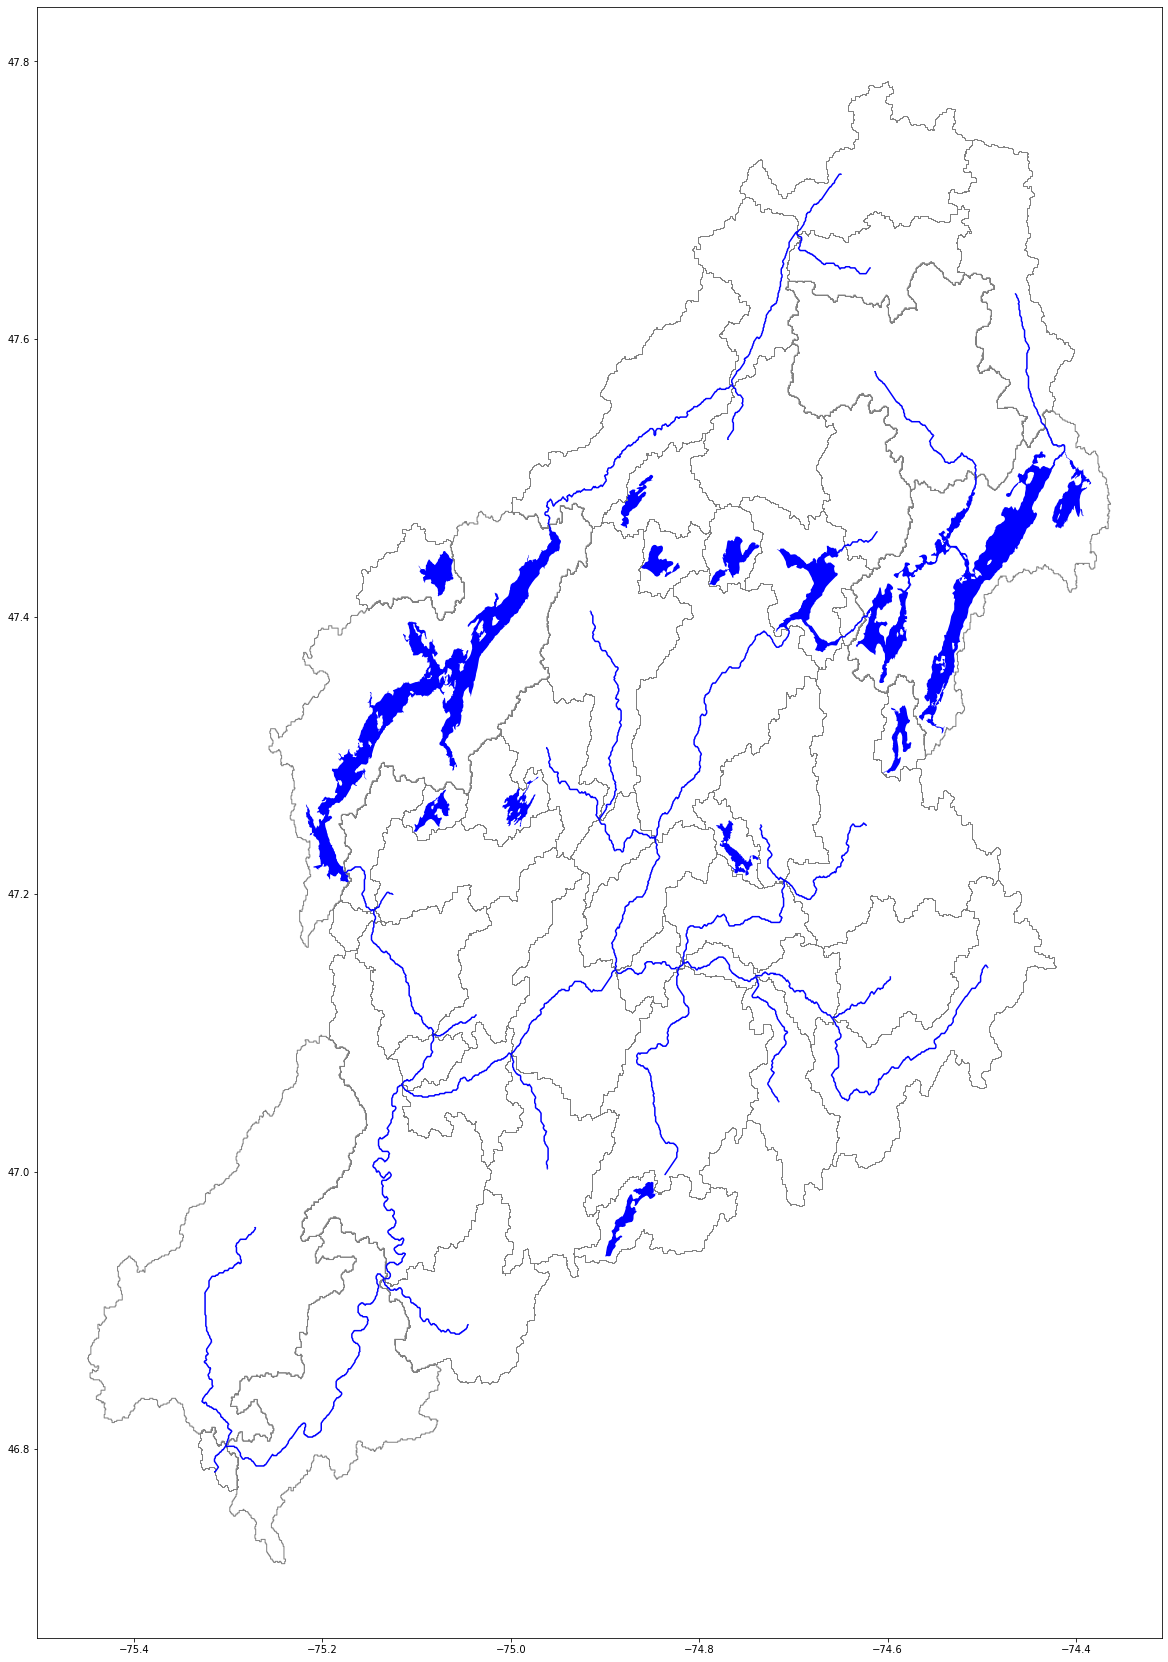

In [11]:

RTtool.Define_Final_Catchment(Path_final_rivply = Path_final_riv_ply,
                              Path_final_riv = Path_final_riv, 
                              OutputFolder = Output_Folder_simplify_by_Lake)  

### The routing product inlucding three part
# first part
Path_final_info      =os.path.join(Output_Folder_simplify_by_Lake,'finalcat_info.shp')
Path_final_info_riv  =os.path.join(Output_Folder_simplify_by_Lake,'finalcat_info_riv.shp')
# third part
Path_Con_Lake_ply    = os.path.join(Output_Folder_simplify_by_Lake,'Con_Lake_Ply.shp')      ### Connected lake polygons
Path_NonCon_Lake_ply = os.path.join(Output_Folder_simplify_by_Lake,'Non_Con_Lake_Ply.shp')  ### None connected lake polygons



### plot ready to be used routing product 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_fisrtpart = gdb.read_file(Path_final_info_riv)
riv_fisrtpart.plot(color="blue",ax=ax)

subbasin_fisrtpart = gdb.read_file(Path_final_info)
subbasin_fisrtpart.plot(color="None", edgecolor='grey',ax=ax)

## Tool 5 Generate HRU
------

begin union


<AxesSubplot:>

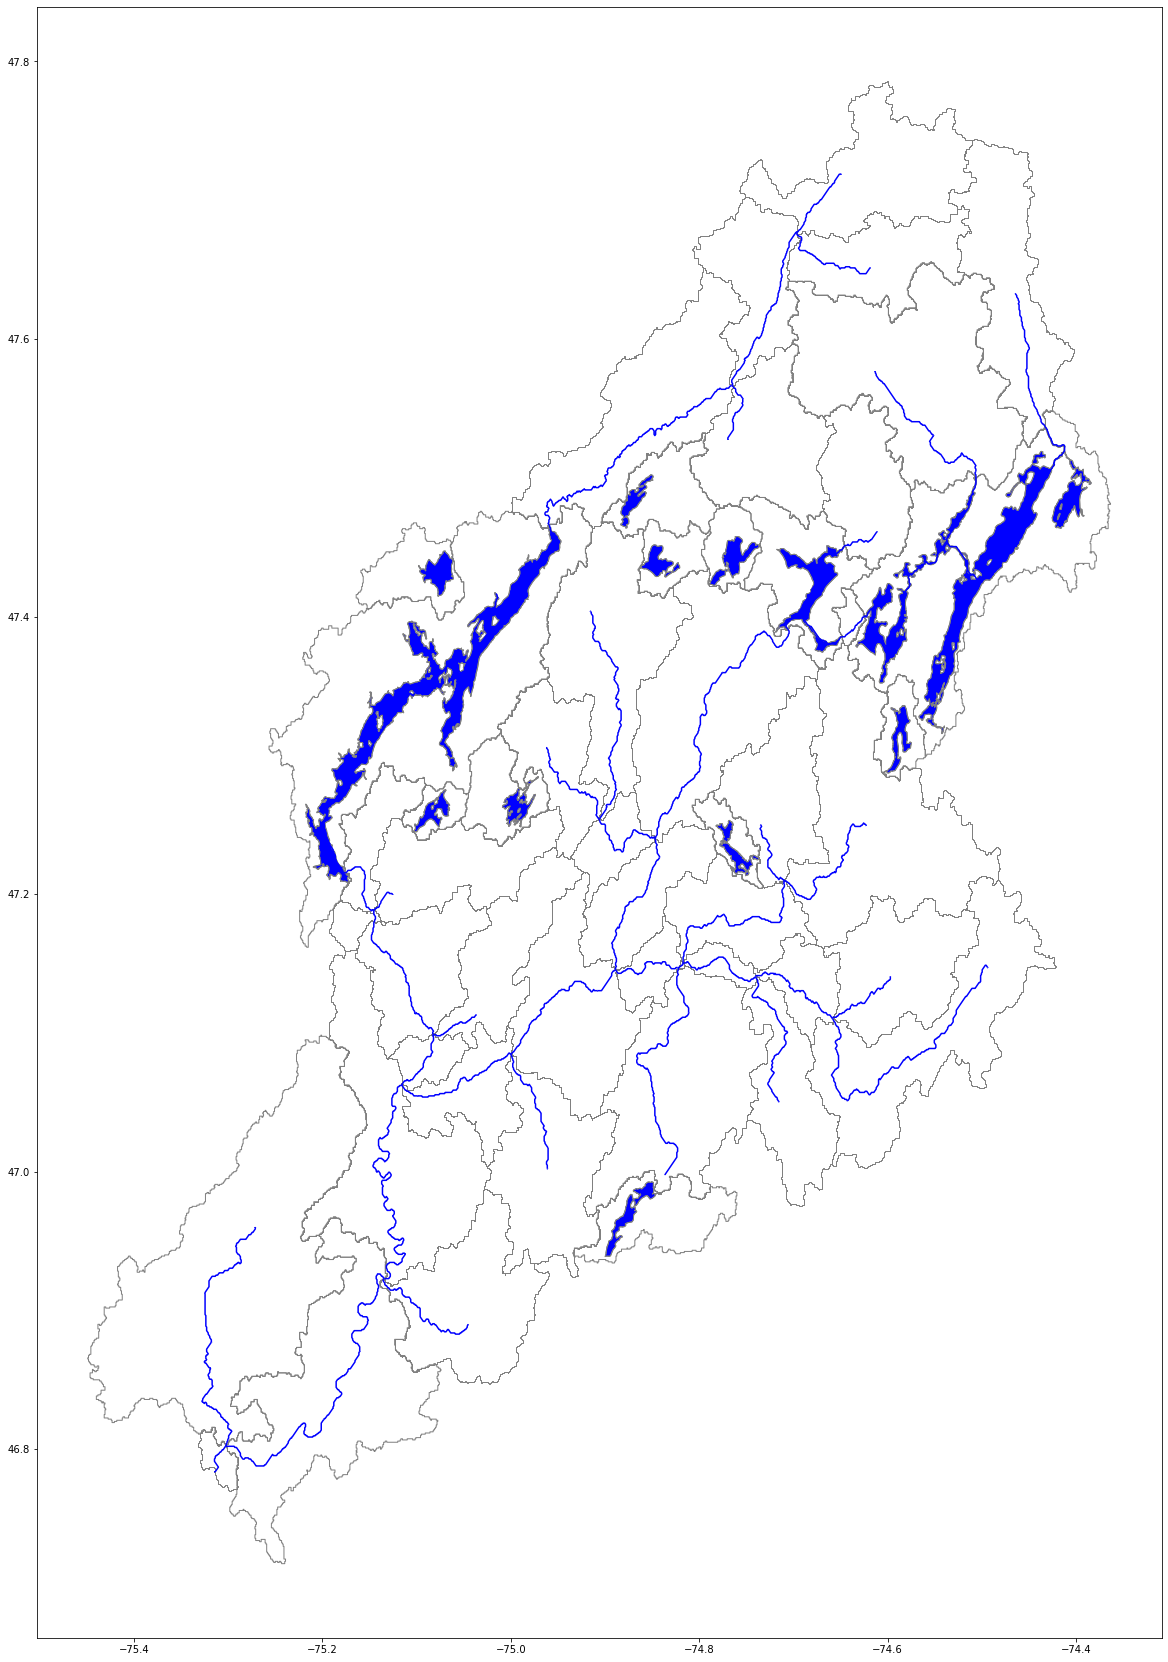

In [13]:
HRU_Folder = os.path.join(GitHub_Folder,'RoutingTool','Toolbox_QGIS','tests','testdata','HRU')

RTtool.GenerateHRUS(OutputFolder = Output_Folder_simplify_by_Lake,
                             Path_Subbasin_Ply =  os.path.join(Output_Folder_simplify_by_Lake,'finalcat_info.shp'),
                             Path_Connect_Lake_ply = os.path.join(Output_Folder_simplify_by_Lake,'Con_Lake_Ply.shp'),
                             Path_Non_Connect_Lake_ply = os.path.join(Output_Folder_simplify_by_Lake,'Non_Con_Lake_Ply.shp'),
                             Path_Landuse_Ply = '#',Landuse_ID = 'Landuse_ID',
                             Path_Soil_Ply = '#',Soil_ID = 'Soil_ID',
                             Path_Veg_Ply = '#',Veg_ID = 'Veg_ID',
                             Path_Other_Ply_1='#', Other_Ply_ID_1='O_ID_1',
                             Path_Other_Ply_2='#', Other_Ply_ID_2='O_ID_2',
                             Landuse_info=os.path.join(HRU_Folder,'landuse_info.csv'),
                             Soil_info=os.path.join(HRU_Folder,'soil_info.csv'),
                             Veg_info=os.path.join(HRU_Folder,'veg_info.csv'),
                             DEM = '#')  

### one output file will be generated 
Path_finalcat_hru_info = os.path.join(Output_Folder_simplify_by_Lake,'finalcat_hru_info.shp')

### plot ready to be used routing product 
fig, ax = plt.subplots(figsize = (30,30))
Con_lake = gdb.read_file(Path_Con_Lake_ply)
Con_lake.plot(color="blue", edgecolor='None',ax=ax)
NonCon_lake = gdb.read_file(Path_NonCon_Lake_ply)
NonCon_lake.plot(color="blue", edgecolor='None',ax=ax)

riv_fisrtpart = gdb.read_file(Path_final_info_riv)
riv_fisrtpart.plot(color="blue",ax=ax)

subbasin_fisrtpart = gdb.read_file(Path_finalcat_hru_info)
subbasin_fisrtpart.plot(color="None", edgecolor='grey',ax=ax)

## Tool 6 Generate Raven Inputs
------

In [ ]:
CA_HYDAT   = os.path.join(GitHub_Folder,'Routing_Product','DataBase','Streamflow','Hydat.sqlite3')
RTtool.GenerateRavenInput(Path_final_hru_info = Path_finalcat_hru_info,
                                       OutputFolder = Output_Folder_simplify_by_Lake,
                                       Model_Name   = 'Mytest_model',
                                       WriteObsrvt  = True,
                                       Startyear    = 2010,
                                       EndYear      = 2014,
                                       CA_HYDAT     = CA_HYDAT,
                                       WarmUp       = 1) ##require hydat databse  
### Raven output file will be generated in Output_Folder_simplify_by_Lake/RavenInput/